# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [6]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [7]:
print(data.shape)
print(data.isna().sum())
print(data.duplicated().sum())
print(data.dtypes)

(5391, 6)
Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64
0
Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [8]:
# data_cleaned = data[data['USD_Production_Budget'].str.replace('/$','',regex=True).str.replace(',','',regex=True).astype(int)]
# print(data_cleaned.head())
data['USD_Production_Budget'] = data['USD_Production_Budget'].replace('[\$,]', '', regex=True).astype(float)
data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].replace('[\$,]', '', regex=True).astype(float)
data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].replace('[\$,]', '', regex=True).astype(float)


print(data.dtypes)

Rank                       int64
Release_Date              object
Movie_Title               object
USD_Production_Budget    float64
USD_Worldwide_Gross      float64
USD_Domestic_Gross       float64
dtype: object


<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_104786/707611420.py:3: SyntaxWarning: invalid escape sequence '\$'
  data['USD_Production_Budget'] = data['USD_Production_Budget'].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipykernel_104786/707611420.py:4: SyntaxWarning: invalid escape sequence '\$'
  data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipykernel_104786/707611420.py:5: SyntaxWarning: invalid escape sequence '\$'
  data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].replace('[\$,]', '', regex=True).astype(float)


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [9]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
print(data.head())
print(data.dtypes)

   Rank Release_Date                     Movie_Title  USD_Production_Budget  \
0  5293   1915-08-02           The Birth of a Nation             110,000.00   
1  5140   1916-05-09                     Intolerance             385,907.00   
2  5230   1916-12-24    20,000 Leagues Under the Sea             200,000.00   
3  5299   1920-09-17  Over the Hill to the Poorhouse             100,000.00   
4  5222   1925-01-01                  The Big Parade             245,000.00   

   USD_Worldwide_Gross  USD_Domestic_Gross  
0        11,000,000.00       10,000,000.00  
1                 0.00                0.00  
2         8,000,000.00        8,000,000.00  
3         3,000,000.00        3,000,000.00  
4        22,000,000.00       11,000,000.00  
Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget           float64
USD_Worldwide_Gross             float64
USD_Domestic_Gross              float64
dtype: object


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [10]:
print(data['USD_Production_Budget'].mean())
print(data['USD_Worldwide_Gross'].mean())
print(data['USD_Worldwide_Gross'].min())
print(data['USD_Domestic_Gross'].min())




quantile = data['USD_Worldwide_Gross'].quantile(0.25)
q1 = data[data['USD_Worldwide_Gross'] < quantile ]
loss = (q1['USD_Production_Budget'] > q1['USD_Worldwide_Gross']).sum()
print(f"{loss}: movies lost money out of {q1.shape[0]}")



print(f"The highest usd production of movie is {data['USD_Production_Budget'].max()}\n The highest WorldWide Gross of a movie is {data['USD_Worldwide_Gross'].max()}")



low_buj = data.iloc[data['USD_Production_Budget'].idxmin()]
high_buj = data.iloc[data['USD_Production_Budget'].idxmax()]

print(f"the low budget film detail is : {low_buj[['Movie_Title','USD_Production_Budget','USD_Worldwide_Gross']]}")
print(f"the high budget film detail is : {high_buj[['Movie_Title','USD_Production_Budget','USD_Worldwide_Gross']]}")



31113737.57837136
88855421.96271564
0.0
0.0
1175: movies lost money out of 1348
The highest usd production of movie is 425000000.0
 The highest WorldWide Gross of a movie is 2783918982.0
the low budget film detail is : Movie_Title              My Date With Drew
USD_Production_Budget             1,100.00
USD_Worldwide_Gross             181,041.00
Name: 2427, dtype: object
the high budget film detail is : Movie_Title                       Avatar
USD_Production_Budget     425,000,000.00
USD_Worldwide_Gross     2,783,918,982.00
Name: 3529, dtype: object


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [11]:
zero_rev = data[data['USD_Domestic_Gross'] == 0]
print(len(zero_rev))

high_zero_rev = zero_rev.loc[zero_rev['USD_Production_Budget'].idxmax()]
print(high_zero_rev.head())

512
Rank                                      96
Release_Date             2020-12-31 00:00:00
Movie_Title                      Singularity
USD_Production_Budget         175,000,000.00
USD_Worldwide_Gross                     0.00
Name: 5388, dtype: object


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [12]:
zero_rev_inter = data[data['USD_Domestic_Gross'] == 0]
print(len(zero_rev_inter))

high_zero_rev = zero_rev_inter.loc[zero_rev_inter['USD_Production_Budget'].idxmax()]
print(high_zero_rev.head())

512
Rank                                      96
Release_Date             2020-12-31 00:00:00
Movie_Title                      Singularity
USD_Production_Budget         175,000,000.00
USD_Worldwide_Gross                     0.00
Name: 5388, dtype: object


### Filtering on Multiple Conditions

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [13]:
inter_release = data.query("USD_Worldwide_Gross > 0 and USD_Domestic_Gross == 0")
print(f"Number of movies: {inter_release.shape[0]}")
print(inter_release.head())

Number of movies: 155
      Rank Release_Date              Movie_Title  USD_Production_Budget  \
71    4310   1956-02-16                 Carousel           3,380,000.00   
1579  5087   2001-02-11  Everything Put Together             500,000.00   
1744  3695   2001-12-31                 The Hole           7,500,000.00   
2155  4236   2003-12-31                  Nothing           4,000,000.00   
2203  2513   2004-03-31                The Touch          20,000,000.00   

      USD_Worldwide_Gross  USD_Domestic_Gross  
71               3,220.00                0.00  
1579             7,890.00                0.00  
1744        10,834,406.00                0.00  
2155            63,180.00                0.00  
2203         5,918,742.00                0.00  


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [14]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')


In [15]:
cleaned_data = data.query("Release_Date < @scrape_date")
print(len(cleaned_data))

5384


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [16]:
total_movies = len(cleaned_data)
loss = data[data['USD_Production_Budget'] > data['USD_Worldwide_Gross']]
loss_movies = len(loss)
print(f"{loss_movies} movies lost money out of {total_movies}")

percentage = (loss_movies/total_movies)*100
print(f"Movies fail percentage is: {percentage}%")


2014 movies lost money out of 5384
Movies fail percentage is: 37.40713224368499%


# Seaborn for Data Viz: Bubble Charts

In [17]:
import seaborn as sns

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



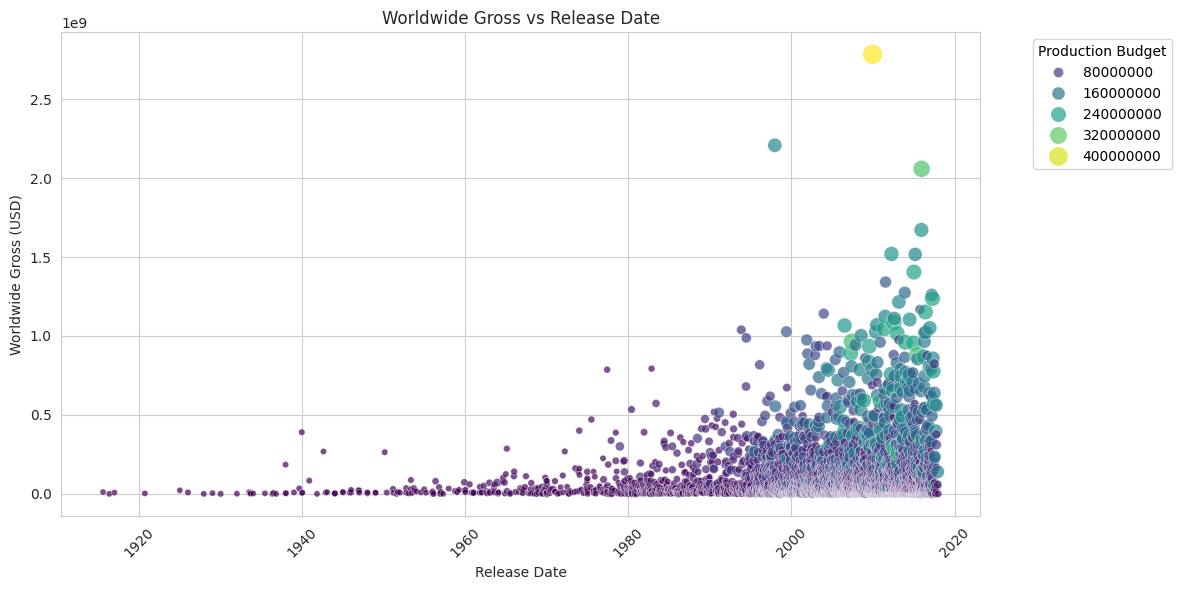

In [19]:
plt.figure(figsize=(10, 6))

with sns.axes_style('whitegrid'):
    ax = sns.scatterplot(
        data=cleaned_data,
        x='Release_Date',
        y='USD_Worldwide_Gross',
        hue='USD_Production_Budget',
        size='USD_Production_Budget',
        sizes=(20, 200),
        palette='viridis',
        alpha=0.7
    )

ax.set_title('Worldwide Gross vs Release Date')
ax.set_xlabel('Release Date')
ax.set_ylabel('Worldwide Gross (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
ax.legend(title='Production Budget', bbox_to_anchor=(1.05, 1), loc='upper left')    
plt.show()


# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [20]:

released_year = cleaned_data['Release_Date'].dt.year
decade = (released_year // 10) * 10

cleaned_data['Decade'] = decade

print(cleaned_data.head())

   Rank Release_Date                     Movie_Title  USD_Production_Budget  \
0  5293   1915-08-02           The Birth of a Nation             110,000.00   
1  5140   1916-05-09                     Intolerance             385,907.00   
2  5230   1916-12-24    20,000 Leagues Under the Sea             200,000.00   
3  5299   1920-09-17  Over the Hill to the Poorhouse             100,000.00   
4  5222   1925-01-01                  The Big Parade             245,000.00   

   USD_Worldwide_Gross  USD_Domestic_Gross  Decade  
0        11,000,000.00       10,000,000.00    1910  
1                 0.00                0.00    1910  
2         8,000,000.00        8,000,000.00    1910  
3         3,000,000.00        3,000,000.00    1920  
4        22,000,000.00       11,000,000.00    1920  


/tmp/ipykernel_104786/2431298797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Decade'] = decade


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [22]:
old_films = cleaned_data[cleaned_data['Release_Date'].dt.year <= 1969]
# print(old_films.head())

new_films = cleaned_data[cleaned_data['Release_Date'].dt.year > 1969]
# print(new_films.head())

print(f"The dataset includes {len(old_films)} old films and {len(new_films)} new films.")

The dataset includes 153 old films and 5231 new films.


# Seaborn Regression Plots

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

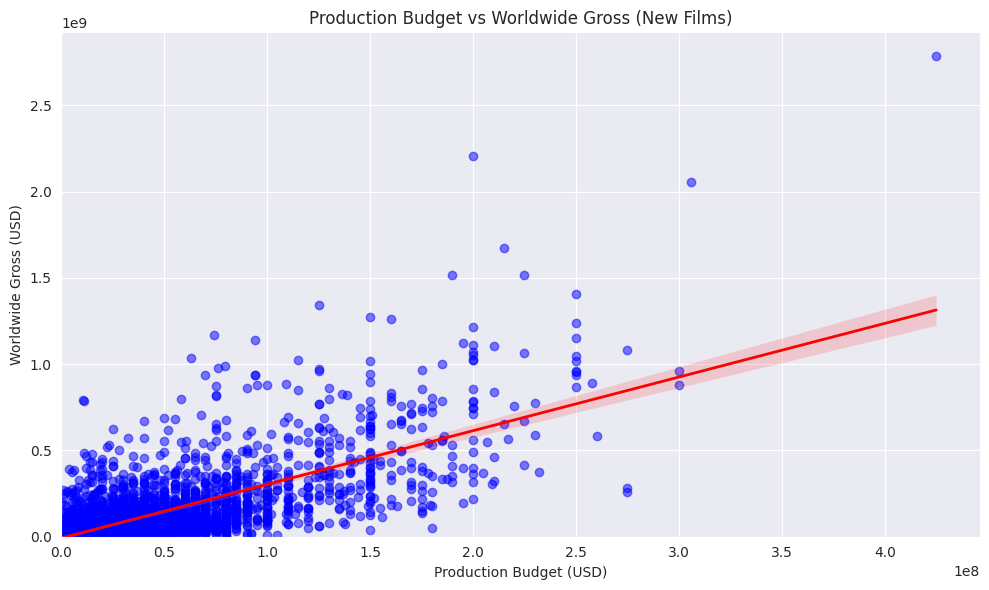

In [26]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))

ax = sns.regplot(
    data=cleaned_data,
    x = 'USD_Production_Budget',
    y = 'USD_Worldwide_Gross',
    scatter_kws={'alpha': 0.5, 'color': 'blue'},
    line_kws={'color': 'red', 'linewidth': 2}
)

ax.set_title('Production Budget vs Worldwide Gross (New Films)')
ax.set_xlabel('Production Budget (USD)')
ax.set_ylabel('Worldwide Gross (USD)')


ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

plt.tight_layout()
plt.show()

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [29]:
# imports 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [34]:
x= old_films[['USD_Production_Budget']]
y = old_films['USD_Worldwide_Gross']

regression = LinearRegression()

regression.fit(x, y)


slope = regression.coef_[0]
intercept = regression.intercept_
print(f"Slope: {slope:,.2f}, Intercept: {intercept:,.2f}")


Slope: 1.65, Intercept: 22,821,538.64


In [35]:
y_predicted = regression.predict(x)
score = r2_score(y,y_predicted)


print(f"R-squared score: {score:.2f}")

R-squared score: 0.03


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [36]:
budget = [[350000000]]

predicted_revinue = regression.predict(budget)
print(f"Predicted worldwide gross for a movie with a budget of $350,000,000: ${predicted_revinue[0]:,.2f}")

Predicted worldwide gross for a movie with a budget of $350,000,000: $599,521,139.04


/media/faisal-chap/Python/DataScience/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
